In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math
     

In [2]:
sd = '2010-01-01'


In [3]:
nasdaq_ticker = "^IXIC"
nse_ticker = "^NSEI"
nasdaq_data = yf.download(nasdaq_ticker,start=sd)
nse_data = yf.download(nse_ticker,start=sd)
nasdaq_close = nasdaq_data['Close']
nse_close = nse_data['Close']

df = pd.concat([nasdaq_close, nse_close], axis=1)
df.columns = ['NASDAQ', 'NSE']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
correlation_coefficient = df['NASDAQ'].corr(df['NSE'])
print("Correlation Coefficient:", correlation_coefficient)
     

Correlation Coefficient: 0.9517418829606006


In [5]:
nasdaq_returns = nasdaq_data['Close'].pct_change()
nse_returns = nse_data['Close'].pct_change()
lagged_nasdaq_returns = nasdaq_returns.shift(1)  
lagged_nse_returns = nse_returns.shift(1)  
df1 = pd.concat([nasdaq_returns, lagged_nasdaq_returns, nse_returns, lagged_nse_returns], axis=1)
df1.columns = ['NASDAQ_Returns', 'Lagged_NASDAQ_Returns', 'NSE_Returns', 'Lagged_NSE_Returns']
correlation_matrix = df1.corr()
lead_lag_correlation = correlation_matrix['NASDAQ_Returns']['Lagged_NSE_Returns']
print("Correlation between NASDAQ returns and lagged NSE returns:", lead_lag_correlation)
     

Correlation between NASDAQ returns and lagged NSE returns: -0.05718013552332302


In [6]:
df_nsei=yf.download("^NSEI",start=sd)
df_nsei
     

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-06-22,18853.599609,18886.599609,18759.500000,18771.250000,18771.250000,252700
2023-06-23,18741.849609,18756.400391,18647.099609,18665.500000,18665.500000,210600
2023-06-26,18682.349609,18722.050781,18646.699219,18691.199219,18691.199219,171300


In [7]:
#keltner channel
def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):   # parameter to be optimized are kc_lookback, multiplier,atr_lookback
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower
df_nsei=df_nsei.iloc[:,:4]


df_nsei['kc_middle'], df_nsei['kc_upper'],df_nsei['kc_lower'] = get_kc(df_nsei['High'], df_nsei['Low'], df_nsei['Close'], 6, 2, 10)
df_nsei

,Open,High,Low,Close,kc_middle,kc_upper,kc_lower
Date,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,5374.900391,5089.500000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5256.807730,5383.507720,5130.107740
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5266.450341,5383.888559,5149.012124
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5265.410401,5382.313984,5148.506819
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5259.917585,5368.810625,5151.024545
...,...,...,...,...,...,...,...
2023-06-22,18853.599609,18886.599609,18759.500000,18771.250000,18713.035141,18973.987972,18452.082310
2023-06-23,18741.849609,18756.400391,18647.099609,18665.500000,18706.244406,18965.932032,18446.556780
2023-06-26,18682.349609,18722.050781,18646.699219,18691.199219,18704.095094,18952.884270,18455.305918


In [8]:
#implementation of Keltner
import numpy as np
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal

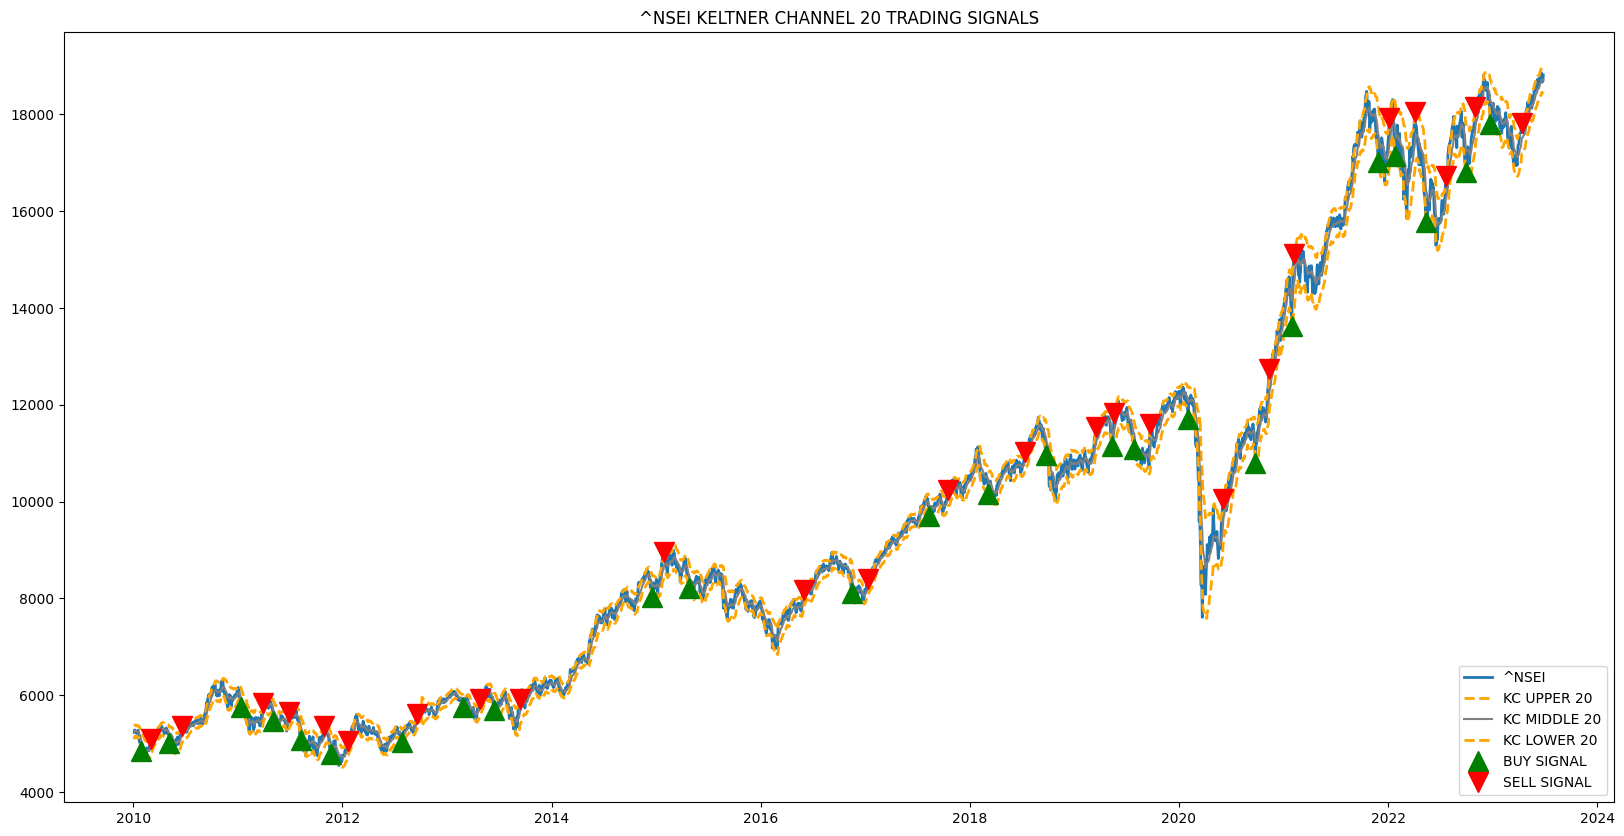

In [9]:
buy_price, sell_price, kc_signal = implement_kc_strategy(df_nsei['Close'], df_nsei['kc_upper'], df_nsei['kc_lower'])
df_nsei=df_nsei.iloc[:-1,:]
plt.figure(figsize=(20,10))
plt.plot(df_nsei['Close'], linewidth = 2, label = '^NSEI')
plt.plot(df_nsei['kc_upper'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(df_nsei['kc_middle'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(df_nsei['kc_lower'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(df_nsei.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(df_nsei.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()

In [10]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()

646.0614034485938

In [11]:
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.7762358088826048

In [12]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")
     

MDD_KC -15.244942026620953 %
CUMM_Return_KC 17.98705869732197 %


In [13]:
df_nsei_bb=yf.download("^NSEI",start=sd)
     

[*********************100%***********************]  1 of 1 completed


In [14]:
#Bollinger Bands indicator
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma
df_nsei_bb["SMA9"]=sma(df_nsei_bb["Close"],5)

def bollinger_bands(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2.06
    lower_bb = sma - std * 2.06
    return upper_bb, lower_bb

In [15]:
df_nsei_bb['upper_bb'], df_nsei_bb['lower_bb'] = bollinger_bands(df_nsei_bb['Close'], df_nsei_bb['SMA9'], 10)
     

In [16]:
#implementing Bollinger bands
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal

buy_price_bb, sell_price_bb, bb_signal = implement_bb_strategy(df_nsei_bb['Close'], df_nsei_bb['lower_bb'], df_nsei_bb['upper_bb'])
     


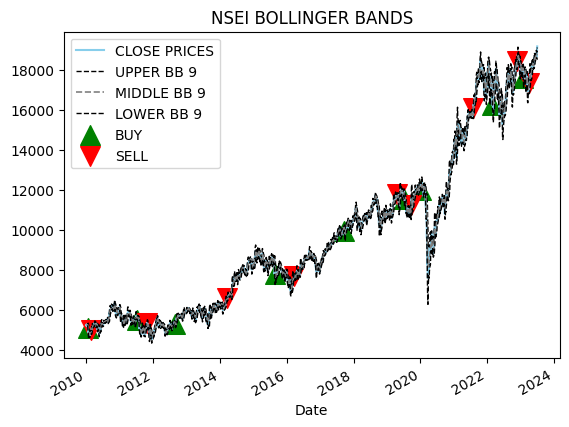

In [17]:
df_nsei_bb['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df_nsei_bb['upper_bb'].plot(label = 'UPPER BB 9', linestyle = '--', linewidth = 1, color = 'black')
df_nsei_bb['SMA9'].plot(label = 'MIDDLE BB 9', linestyle = '--', linewidth = 1.2, color = 'grey')
df_nsei_bb['lower_bb'].plot(label = 'LOWER BB 9', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df_nsei_bb.index, buy_price_bb, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_nsei_bb.index, sell_price_bb, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('NSEI BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.title('NSEI BOLLINGER BANDS')
plt.show()
     


In [18]:
buy_price_bb=pd.DataFrame(buy_price_bb)
buy_price_bb=buy_price_bb.fillna(0)
buy_price_bb=buy_price_bb[~(buy_price_bb == 0).all(axis=1)]
sell_price_bb=pd.DataFrame(sell_price_bb)
sell_price_bb=sell_price_bb.fillna(0)
sell_price_bb=sell_price_bb[~(sell_price_bb == 0).all(axis=1)]
np_buy_bb=np.array(buy_price_bb)
np_sell_bb=np.array(sell_price_bb)
(np_sell_bb-np_buy_bb).mean()
     

957.3279079861111

In [19]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_bb-np_buy_bb)

0.657859301566638

In [20]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_bb-np_buy_bb)

12.077910403811186

In [21]:
print("MDD_BB",(np_buy_bb-np_sell_bb).min()/np_sell_bb[6,0]*100,"%")
print("CUMM_Return_BB",((np_sell_bb-np_buy_bb)/np_buy_bb).max()*100,"%")
     

MDD_BB -25.651009378438694 %
CUMM_Return_BB 34.50081724579576 %


In [22]:
#macd
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df
df_nsei_macd = computeMACD(df_nsei, 52, 112, 52) 

In [23]:
ticker = '^NSEI'


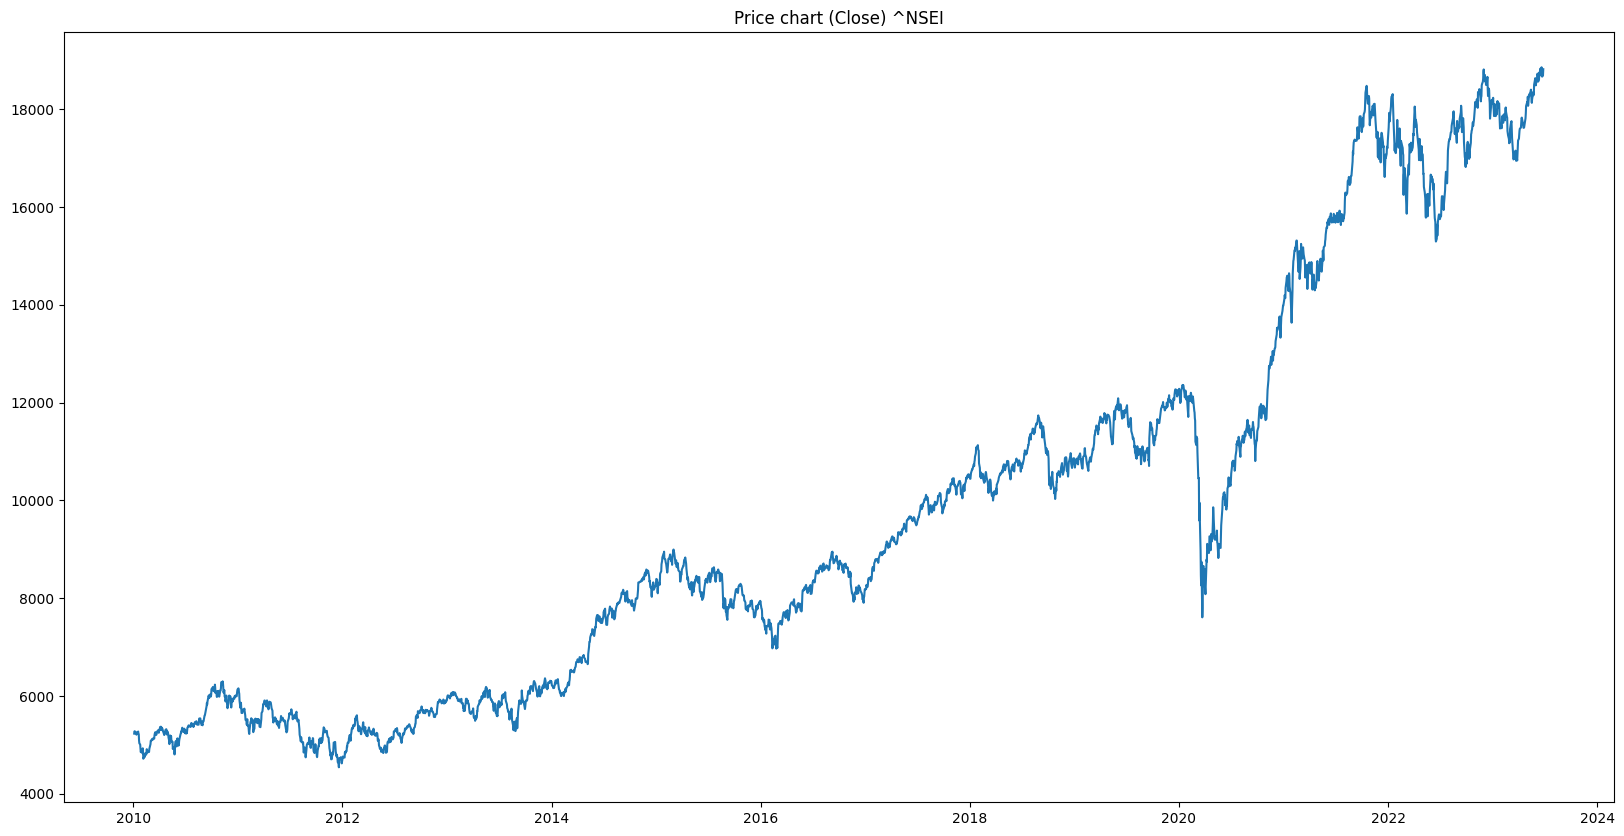

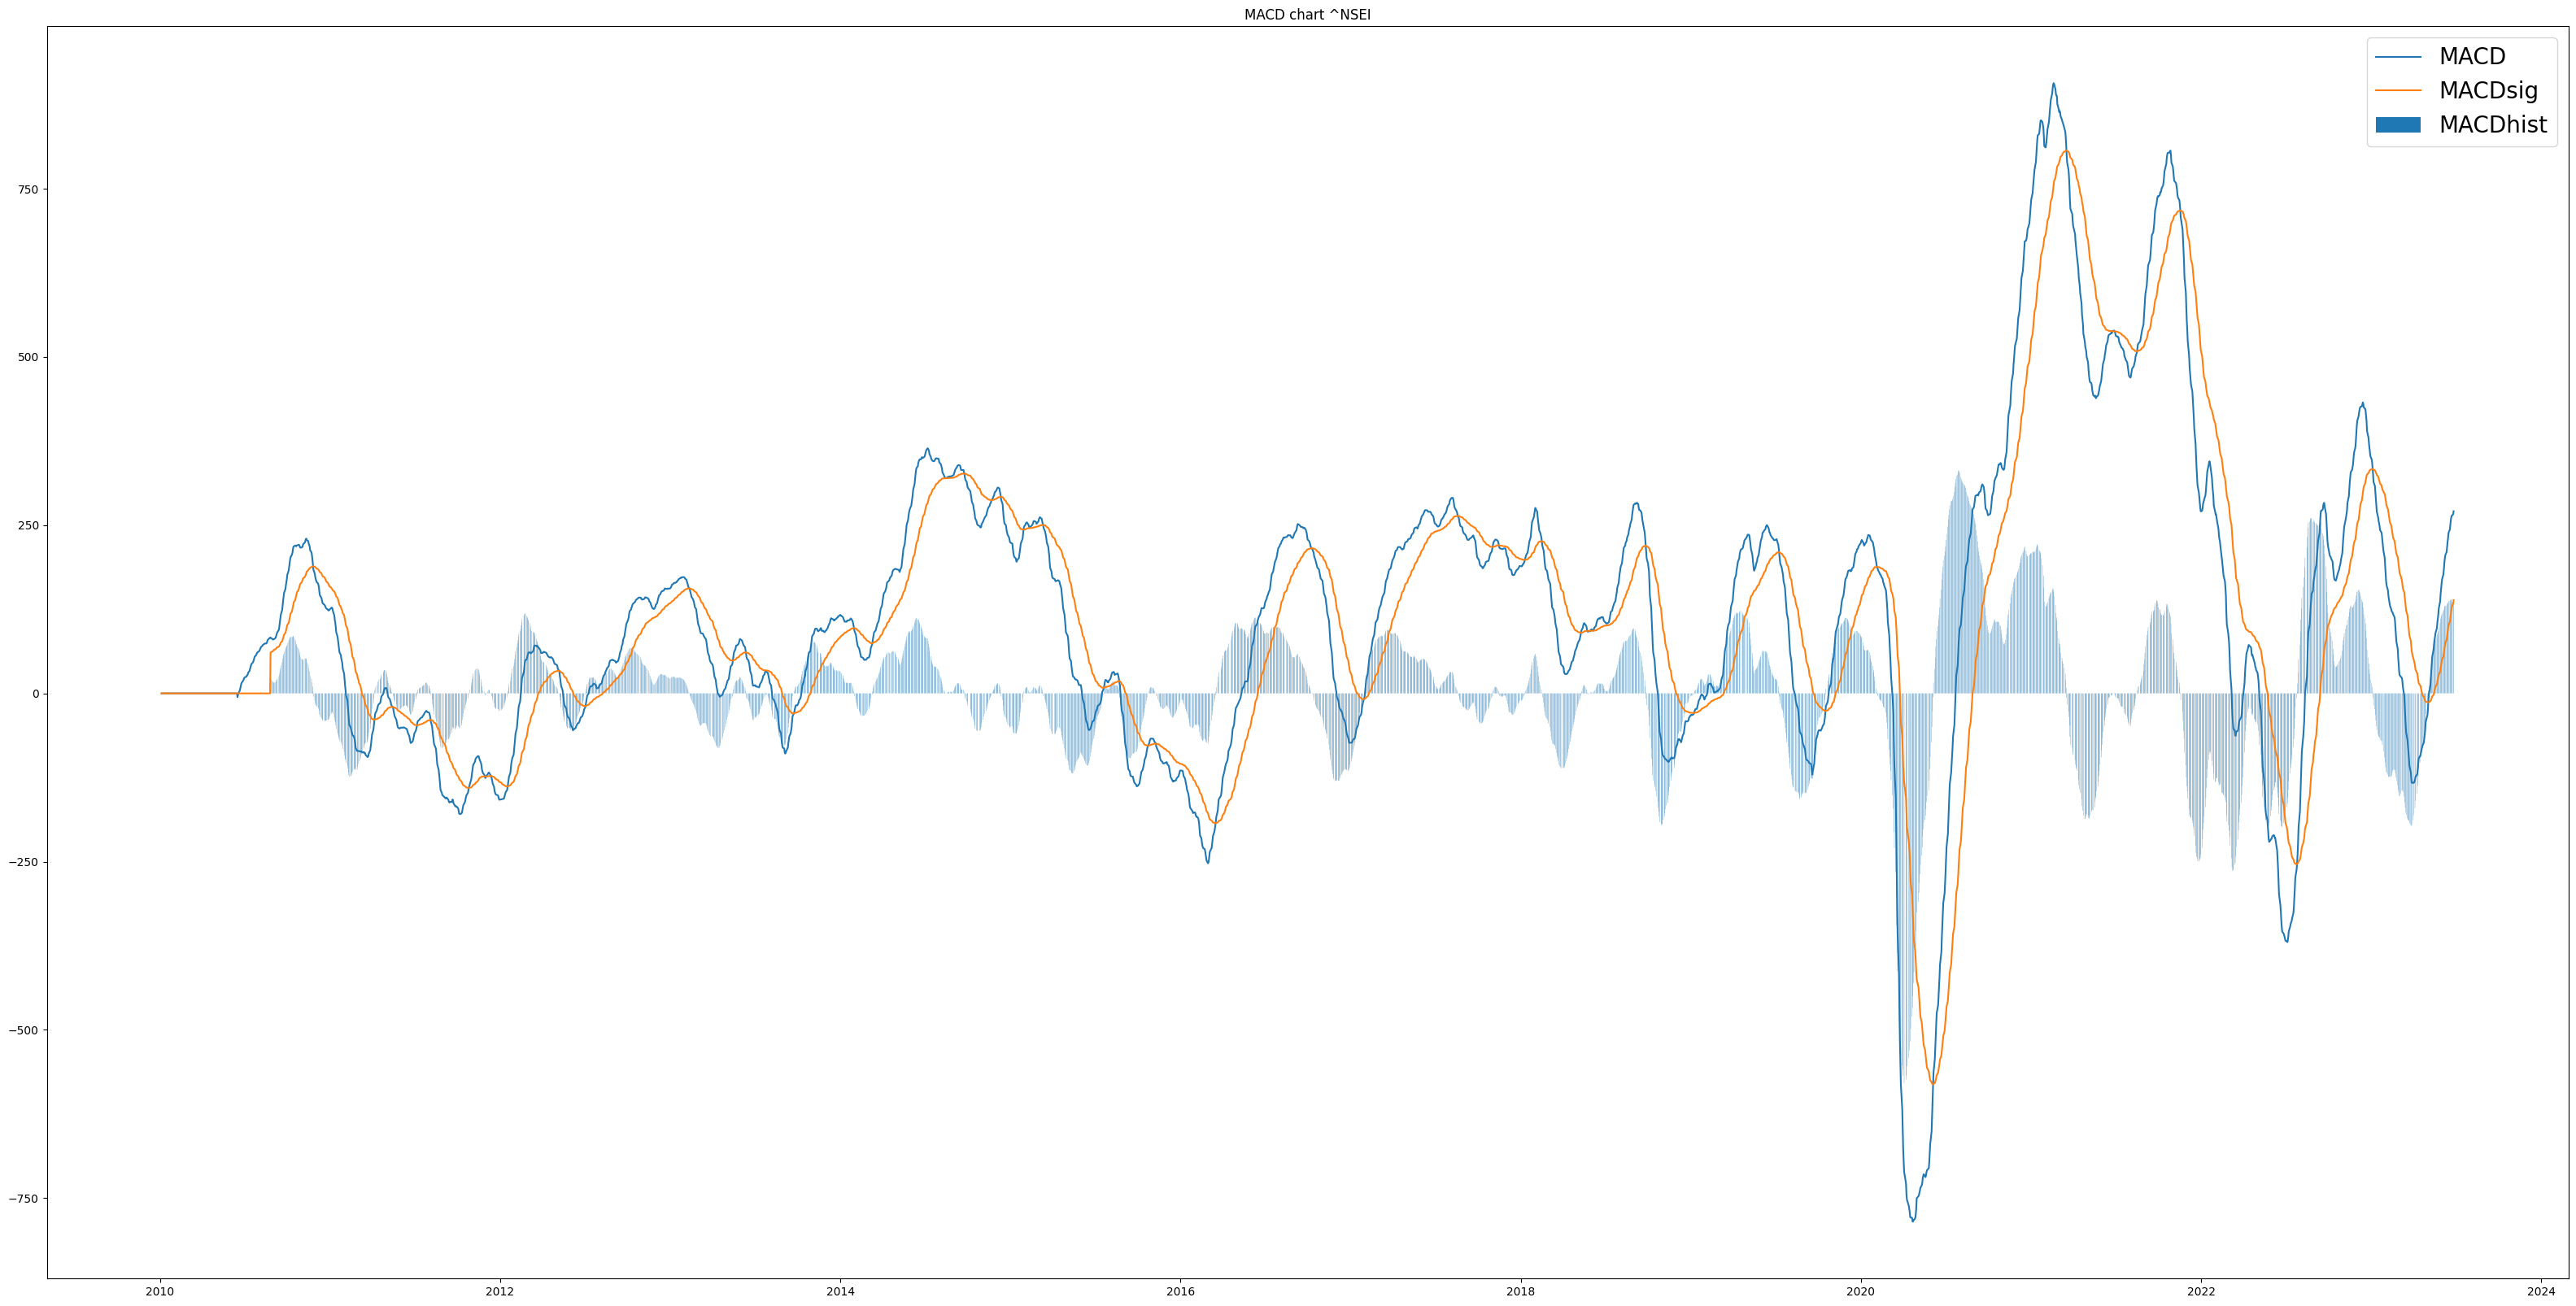

In [24]:
plt.figure(figsize=(20,10))
plt.plot( df_nsei_macd['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(40,20))
plt.title('MACD chart ' + str(ticker))
plt.plot(df_nsei_macd['MACD'].fillna(0),label='MACD')
plt.plot(df_nsei_macd['MACDsig'].fillna(0),label='MACDsig')
plt.bar(df_nsei.index, df_nsei_macd['MACDhist'].fillna(0),width=0.5, snap=False,label='MACDhist')

plt.legend(fontsize="20")
plt.show()

In [25]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(df_nsei_macd)
df_nsei_macd['buy_sig'] = signal[0]
df_nsei_macd['sell_sig'] = signal[1]

In [26]:
buy_sig_md=pd.DataFrame(df_nsei_macd['buy_sig']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(df_nsei_macd['sell_sig']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)

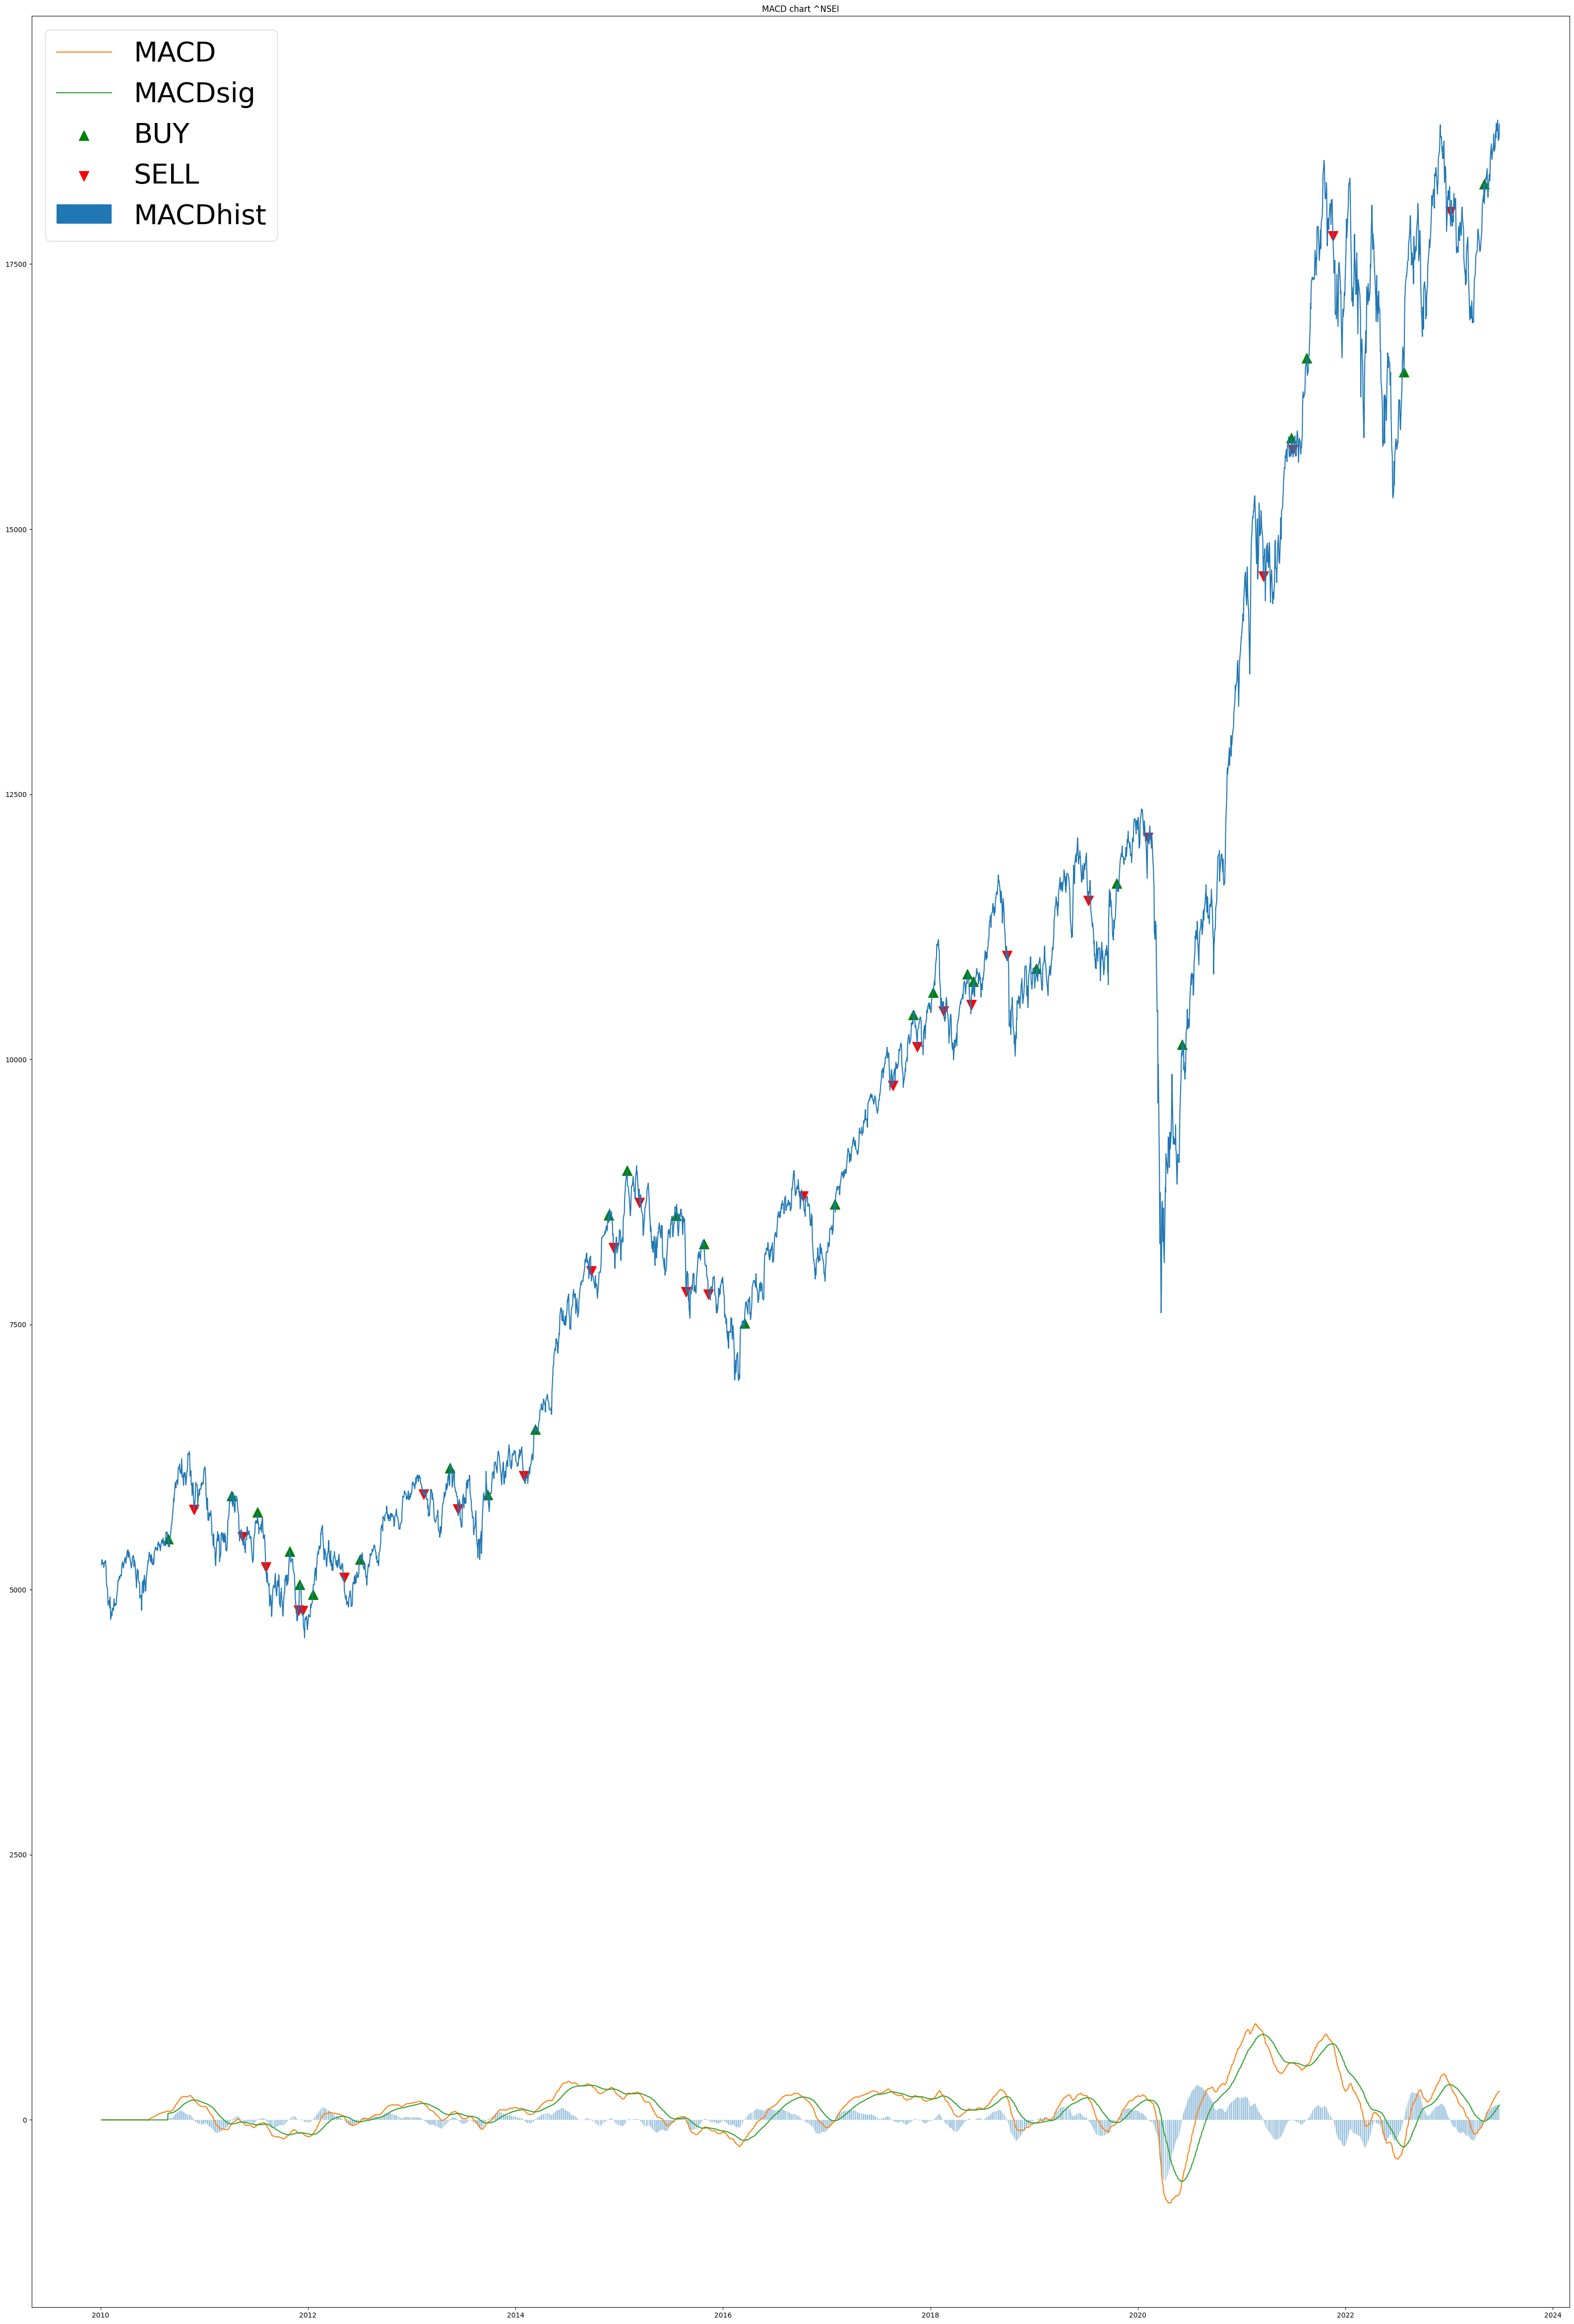

In [27]:
plt.figure(figsize=(40,60))
plt.plot( df_nsei_macd['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.title('MACD chart ' + str(ticker))
plt.plot(df_nsei_macd['MACD'].fillna(0),label='MACD')
plt.plot(df_nsei_macd['MACDsig'].fillna(0),label='MACDsig')
plt.bar( df_nsei.index,df_nsei_macd['MACDhist'].fillna(0),width=0.5, snap=False,label='MACDhist')
plt.scatter(df_nsei_macd.index, df_nsei_macd.buy_sig, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_nsei_macd.index, df_nsei_macd.sell_sig, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()

In [28]:
np_buy_md=np_buy_md[:-1]
(np_sell_md-np_buy_md).mean()
     

331.6904109074519

In [29]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_md-np_buy_md)
     

0.3173554557035216

In [30]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_md-np_buy_md)
     

2.091867723582485

In [31]:
print("MDD_MACD",(np_buy_md-np_sell_md).min()/np_sell_md[22,0]*100,"%")
print("CUMM_Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")
     

MDD_MACD -30.33208432038182 %
CUMM_Return_MACD 43.53809644581584 %


[*********************100%***********************]  1 of 1 completed


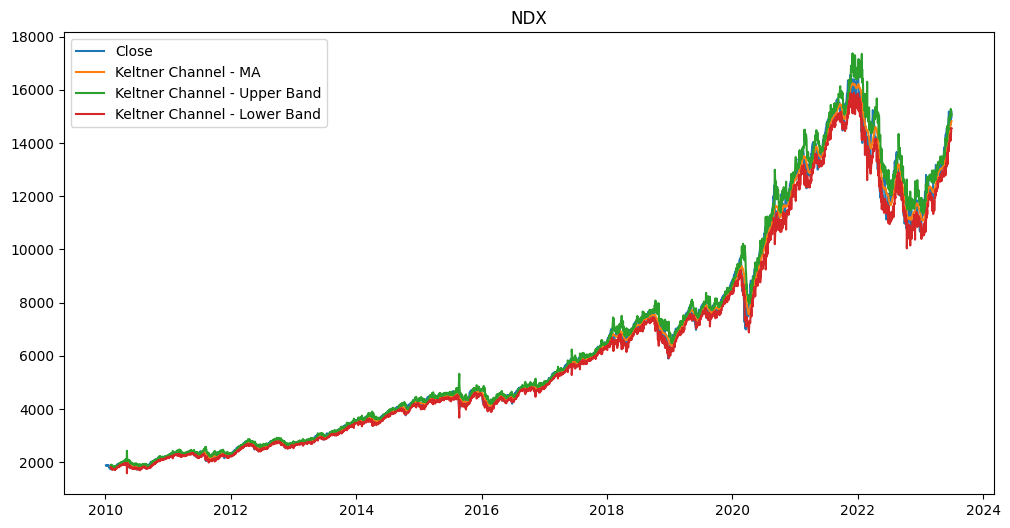

In [32]:
data=yf.download('^NDX', start=sd)
data['KC_MA'] = data['Close'].rolling(window=20).mean()
data['KC_ATR'] = data['High'] - data['Low']
data['KC_UB'] = data['KC_MA'] + (2 * data['KC_ATR'])
data['KC_LB'] = data['KC_MA'] - (2 * data['KC_ATR'])
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['KC_MA'], label='Keltner Channel - MA')
plt.plot(data['KC_UB'], label='Keltner Channel - Upper Band')
plt.plot(data['KC_LB'], label='Keltner Channel - Lower Band')
plt.title("NDX")
plt.legend()
plt.show()

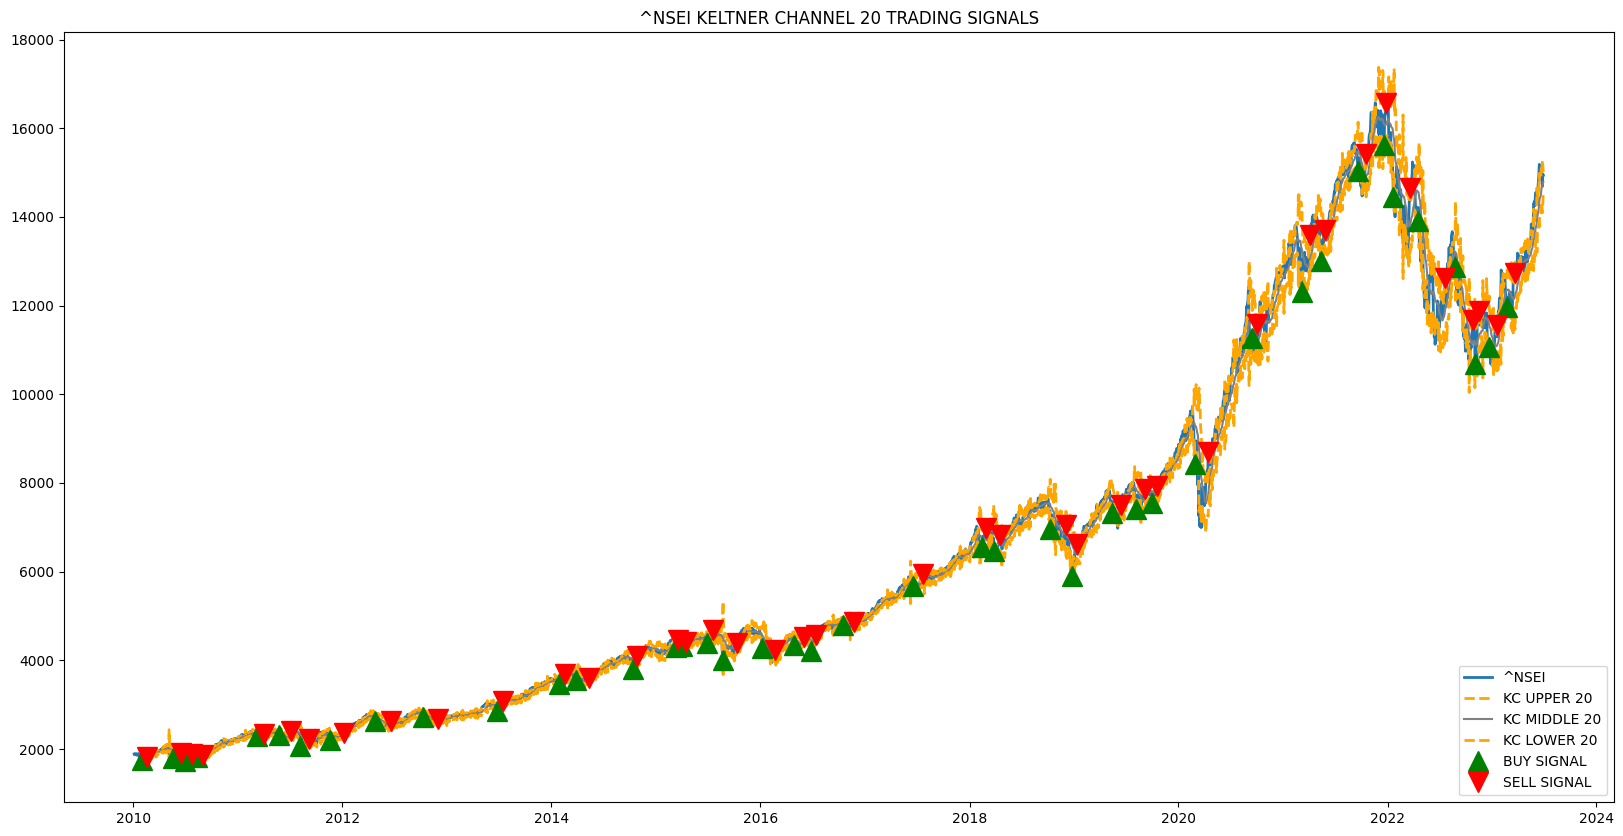

In [33]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = implement_kc_strategy(data['Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(data['KC_MA'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(data['KC_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()

In [34]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [35]:
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)
sharpe_ratio(np2-np1)

0.5345554145045922

In [36]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.3998792079956027

In [37]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")
     

MDD_KC -30.701894989649354 %
CUMM_Return_KC 12.231683690660775 %


In [38]:
df_ndx = yf.download("^NDX",start=sd)

[*********************100%***********************]  1 of 1 completed


In [39]:
df_ndaq_bb=yf.download("NDAQ",start=sd)

#Bollinger Bands indicator
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma
df_ndaq_bb["SMA9"]=sma(df_ndaq_bb["Close"],5)

def bollinger_bands(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2.06
    lower_bb = sma - std * 2.06
    return upper_bb, lower_bb
df_ndaq_bb['upper_bb'], df_ndaq_bb['lower_bb'] = bollinger_bands(df_ndaq_bb['Close'], df_ndaq_bb['SMA9'], 10)
     

[*********************100%***********************]  1 of 1 completed


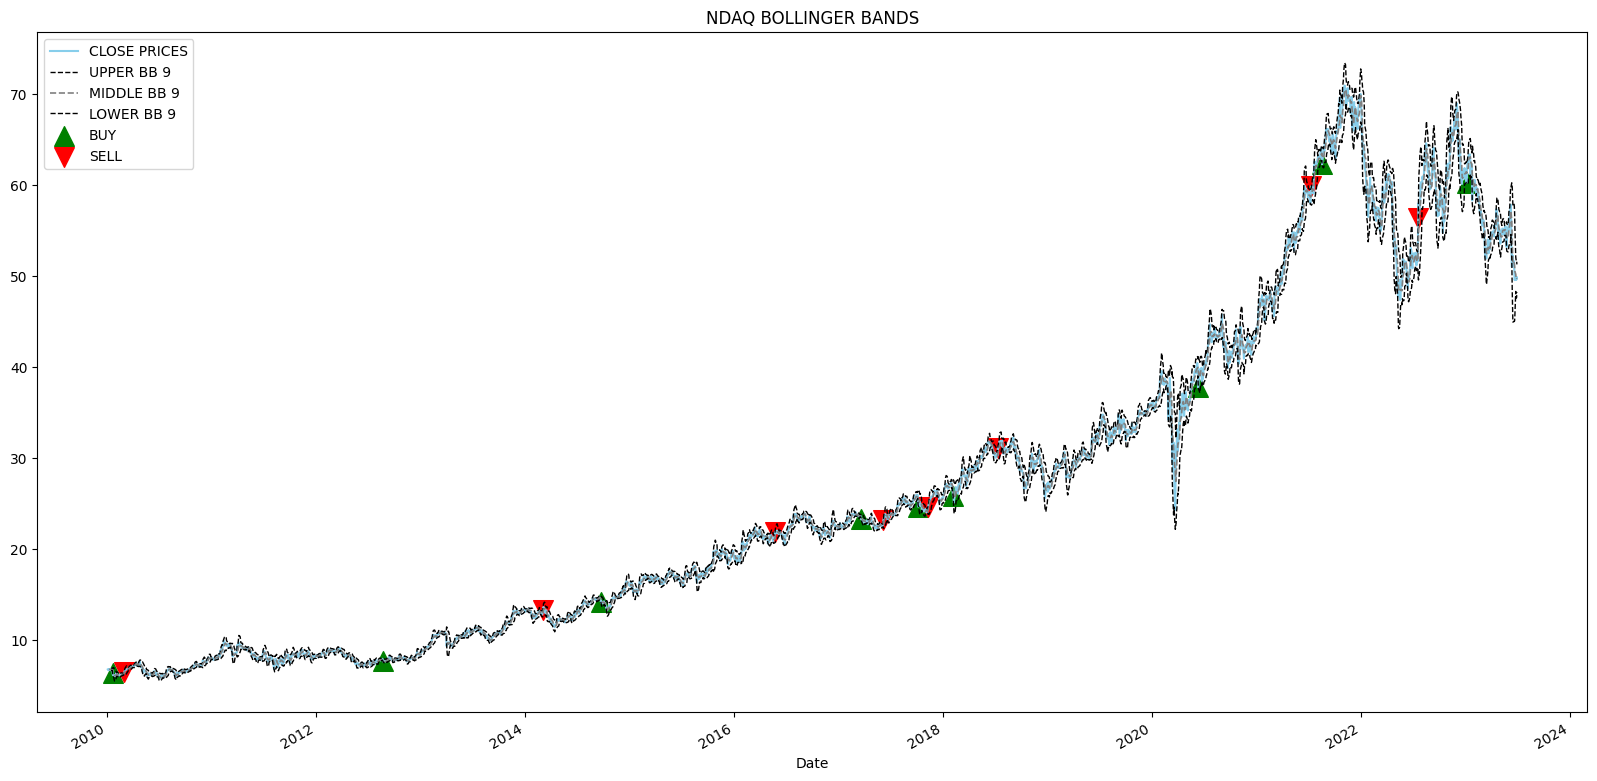

In [40]:
#implementing Bollinger bands
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal

buyprice_bb_ndaq, sellprice_bb_ndaq, bb_signal_ndaq = implement_bb_strategy(df_ndaq_bb['Close'], df_ndaq_bb['lower_bb'], df_ndaq_bb['upper_bb'])
plt.figure(figsize=(20,10))
df_ndaq_bb['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df_ndaq_bb['upper_bb'].plot(label = 'UPPER BB 9', linestyle = '--', linewidth = 1, color = 'black')
df_ndaq_bb['SMA9'].plot(label = 'MIDDLE BB 9', linestyle = '--', linewidth = 1.2, color = 'grey')
df_ndaq_bb['lower_bb'].plot(label = 'LOWER BB 9', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df_ndaq_bb.index, buyprice_bb_ndaq, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_ndaq_bb.index, sellprice_bb_ndaq, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('NDAQ BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.title('NDAQ BOLLINGER BANDS')
plt.show()

In [41]:
buy_bb_ndaq=pd.DataFrame(buyprice_bb_ndaq)
buy_bb_ndaq=buy_bb_ndaq.fillna(0)
buy_bb_ndaq=buy_bb_ndaq[~(buy_bb_ndaq == 0).all(axis=1)]
sell_bb_ndaq=pd.DataFrame(sellprice_bb_ndaq)
sell_bb_ndaq=sell_bb_ndaq.fillna(0)
sell_bb_ndaq=sell_bb_ndaq[~(sell_bb_ndaq == 0).all(axis=1)]
buy_bb_ndaq=np.array(buy_bb_ndaq)
sell_bb_ndaq=np.array(sell_bb_ndaq)

buy_bb_ndaq=np.delete(buy_bb_ndaq,8,0)

def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)
sharpe_ratio(sell_bb_ndaq-buy_bb_ndaq)

0.5542862273838721

In [42]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_bb_ndaq-buy_bb_ndaq)

1.5647650550807886

In [43]:
print("MDD_BB",(buy_bb_ndaq-sell_bb_ndaq).min()/sell_bb_ndaq[6,0]*100,"%")
print("CUMM_Return_BB",((sell_bb_ndaq-buy_bb_ndaq)/buy_bb_ndaq).max()*100,"%")
     

MDD_BB -36.9607548858279 %
CUMM_Return_BB 74.11455901713911 %


In [44]:
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df
df_ndaq_macd = computeMACD(df_ndaq_bb, 52, 112, 52) 
     


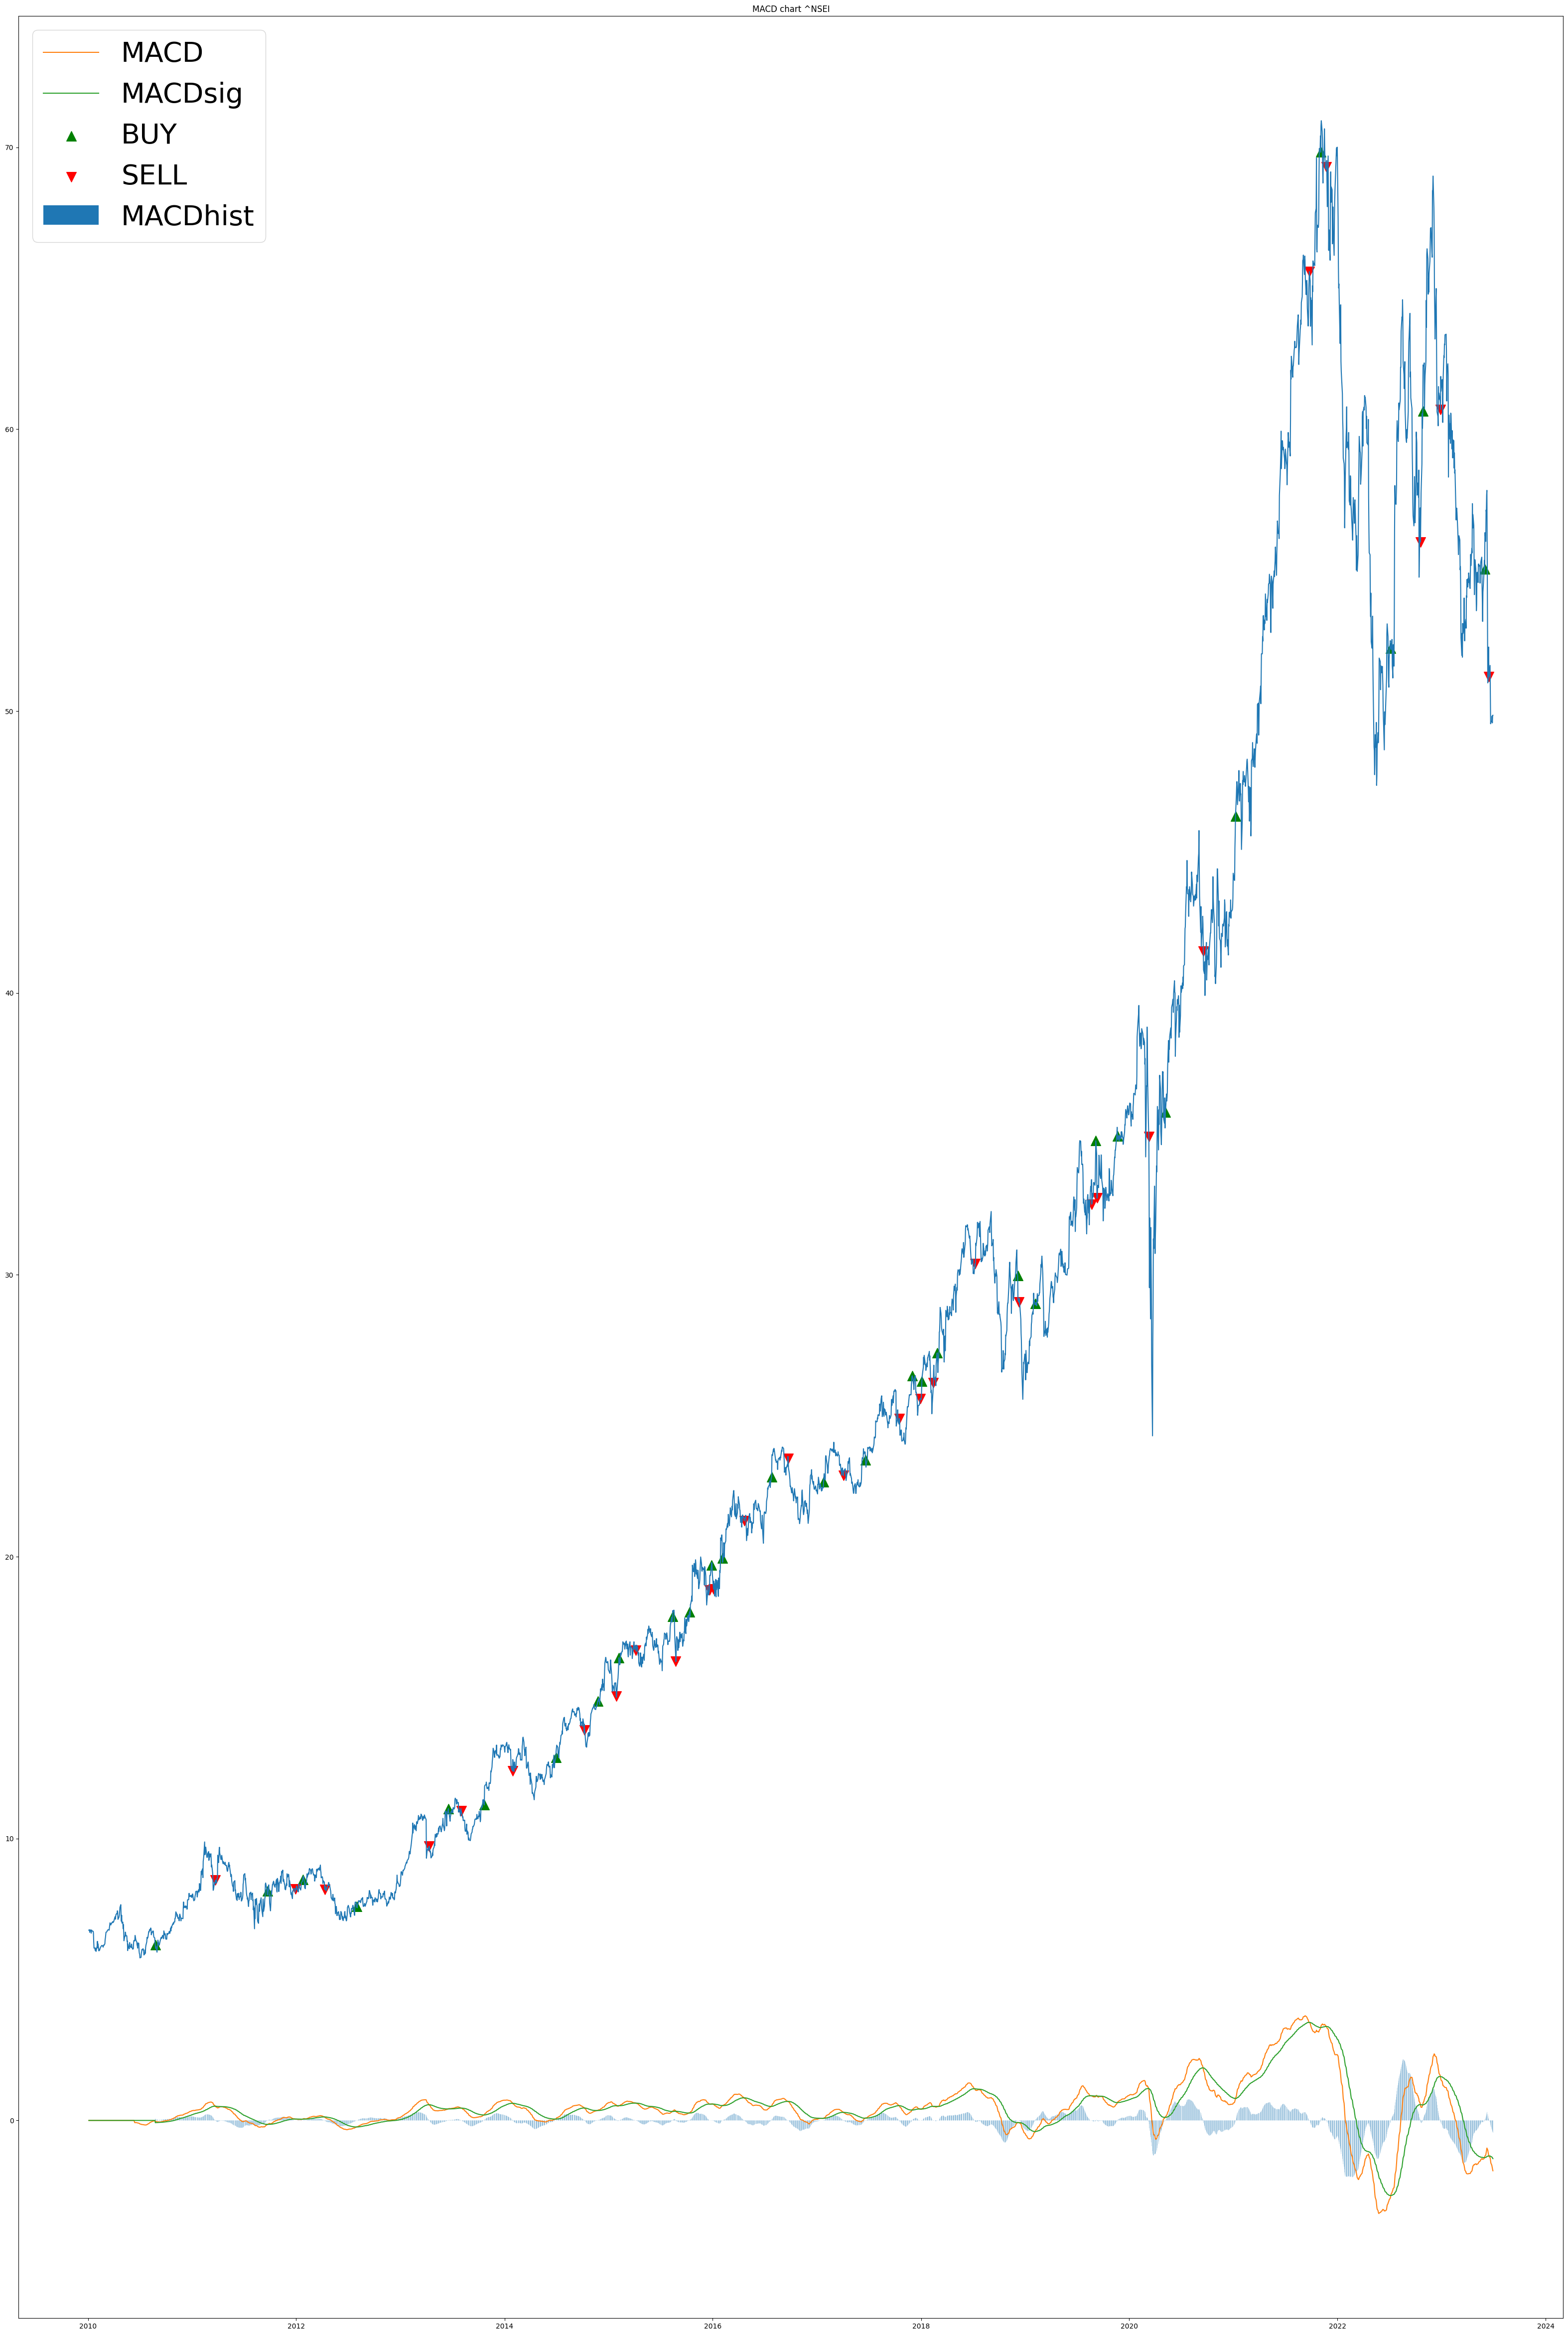

In [45]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(df_ndaq_macd)
df_ndaq_macd['buysig_macd'] = signal[0]
df_ndaq_macd['sellsig_macd'] = signal[1]
plt.figure(figsize=(40,60))
plt.plot( df_ndaq_macd['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.title('MACD chart ' + str(ticker))
plt.plot(df_ndaq_macd['MACD'].fillna(0),label='MACD')
plt.plot(df_ndaq_macd['MACDsig'].fillna(0),label='MACDsig')
plt.bar( df_ndaq_macd.index,df_ndaq_macd['MACDhist'].fillna(0),width=0.5, snap=False,label='MACDhist')
plt.scatter(df_ndaq_macd.index, df_ndaq_macd.buysig_macd, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_ndaq_macd.index, df_ndaq_macd.sellsig_macd, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()